In [2]:
import pandas as pd 
import numpy as np 
# 用于在jupyter notebook展示matplot图表
%matplotlib inline

In [5]:
df = pd.DataFrame({
    'A':['foo', 'bar', 'foo', 'bar', 'foo', 'bar','foo', 'foo'],
    'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
    'C': np.random.randn(8),
    'D': np.random.randn(8)
    })

In [6]:
df

,A,B,C,D
0,foo,one,0.663262,-0.697203
1,bar,one,-1.218582,0.017434
2,foo,two,0.174657,-1.050833
3,bar,three,1.538669,-0.698189
4,foo,two,0.774947,-0.310455
5,bar,two,0.298008,-0.323151
6,foo,one,-0.801415,-0.030509
7,foo,three,-0.209094,-0.161685


In [8]:
df.groupby('A').sum()

,C,D
A,,
bar,0.618095,-1.003906
foo,0.602357,-2.250686


In [11]:
df.groupby(['A', 'B'], as_index = True).mean()

C         D
A   B                        
bar one   -1.218582  0.017434
    three  1.538669 -0.698189
    two    0.298008 -0.323151
foo one   -0.069077 -0.363856
    three -0.209094 -0.161685
    two    0.474802 -0.680644

In [14]:
# 同时查看多种数据统计
df.groupby('A').agg([np.sum, np.mean, np.std])['C']

,sum,mean,std
A,,,
bar,0.618095,0.206032,1.380924
foo,0.602357,0.120471,0.648919


In [16]:
df.groupby('A').agg({'C':np.sum, 'D':np.mean})

,C,D
A,,
bar,0.618095,-0.334635
foo,0.602357,-0.450137


In [17]:
g = df.groupby('A')

In [23]:
for name, group in g:
    print(name)
    print(group)

bar
     A      B         C         D
1  bar    one -1.218582  0.017434
3  bar  three  1.538669 -0.698189
5  bar    two  0.298008 -0.323151
foo
     A      B         C         D
0  foo    one  0.663262 -0.697203
2  foo    two  0.174657 -1.050833
4  foo    two  0.774947 -0.310455
6  foo    one -0.801415 -0.030509
7  foo  three -0.209094 -0.161685


In [24]:
g.get_group('bar')

,B,C,D
1,one,-1.218582,0.017434
3,three,1.538669,-0.698189
5,two,0.298008,-0.323151


In [25]:
g = df.groupby(['A', 'B'])

In [26]:
for name, group in g:
    print(name) # name为一个包含2个元素的元组，代表不同的列
    print(group)
    print()

('bar', 'one')
     A    B         C         D
1  bar  one -1.218582  0.017434

('bar', 'three')
     A      B         C         D
3  bar  three  1.538669 -0.698189

('bar', 'two')
     A    B         C         D
5  bar  two  0.298008 -0.323151

('foo', 'one')
     A    B         C         D
0  foo  one  0.663262 -0.697203
6  foo  one -0.801415 -0.030509

('foo', 'three')
     A      B         C         D
7  foo  three -0.209094 -0.161685

('foo', 'two')
     A    B         C         D
2  foo  two  0.174657 -1.050833
4  foo  two  0.774947 -0.310455



In [28]:
df.groupby(['A', 'B']).mean()

C         D
A   B                        
bar one   -1.218582  0.017434
    three  1.538669 -0.698189
    two    0.298008 -0.323151
foo one   -0.069077 -0.363856
    three -0.209094 -0.161685
    two    0.474802 -0.680644

In [32]:
pwd

'c:\\Users\\Lei\\Documents\\GitHub\\ant-learn-pandas'

# 实例：利用groupby查看上海天气

In [33]:
fpath = "./shanghai_weather/shanghai_weather_2019.csv"
df = pd.read_csv(fpath)

In [34]:
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2019-01-01,6℃,3℃,阴~多云,西北风,3级,39,优,1
1,2019-01-02,8℃,4℃,阴~多云,东北风,2级,86,良,2
2,2019-01-03,10℃,8℃,多云~小雨,东北风,2级,71,良,2
3,2019-01-04,10℃,8℃,小雨,东南风,2级,33,优,1
4,2019-01-05,10℃,5℃,小雨,西北风,2级,46,优,1


In [35]:
df.loc[:, 'bWendu'] = df['bWendu'].str.replace("℃", "").astype('int32')

In [36]:
df.loc[:, 'yWendu'] = df['yWendu'].str.replace("℃", "").astype('int32')

In [37]:
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2019-01-01,6,3,阴~多云,西北风,3级,39,优,1
1,2019-01-02,8,4,阴~多云,东北风,2级,86,良,2
2,2019-01-03,10,8,多云~小雨,东北风,2级,71,良,2
3,2019-01-04,10,8,小雨,东南风,2级,33,优,1
4,2019-01-05,10,5,小雨,西北风,2级,46,优,1


In [38]:
df['month'] = df['ymd'].str[:7]

In [40]:
data = df.groupby('month')['bWendu'].max()

<AxesSubplot:xlabel='month'>

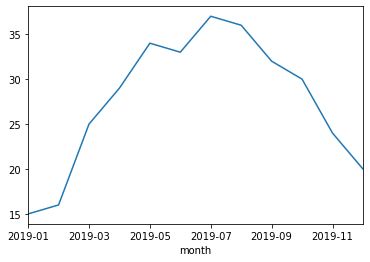

In [42]:
data.plot()

In [43]:
df['wencha'] = df['bWendu'] - df['yWendu']

In [44]:
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,month,wencha
0,2019-01-01,6,3,阴~多云,西北风,3级,39,优,1,2019-01,3
1,2019-01-02,8,4,阴~多云,东北风,2级,86,良,2,2019-01,4
2,2019-01-03,10,8,多云~小雨,东北风,2级,71,良,2,2019-01,2
3,2019-01-04,10,8,小雨,东南风,2级,33,优,1,2019-01,2
4,2019-01-05,10,5,小雨,西北风,2级,46,优,1,2019-01,5


In [45]:
data = df.groupby('month')['wencha'].mean()

<AxesSubplot:xlabel='month'>

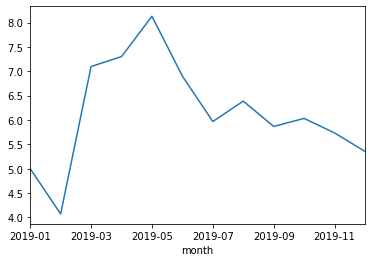

In [46]:
data.plot()

In [47]:
data = df.groupby('month')['wencha'].agg([np.max, np.min, np.mean])

<AxesSubplot:xlabel='month'>

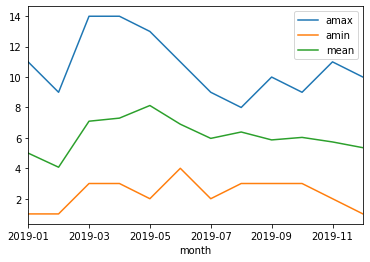

In [48]:
data.plot()